In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ESN import ESN
from learn_esn import train_esn
import gc

In [2]:
input_length = 1000
day = 8640

In [3]:
df = pd.read_csv('../datasets/processed/windowed_250.csv')
data = df['usage'][:day*2].copy()
del df
gc.collect()
data = np.array(data)
data.shape

(17280,)

In [10]:
esn = ESN(1, 2000, 1)
train_esn(esn, data, input_length, day-input_length, alpha=2)

!!!ERROR SPECTRAL RADIUS > 1!!!
(15280, 2000)


In [11]:
esn.reservoir = [0.0 for i in range(esn.reservoir_size)]
output = [0] * (len(data)+1)
for i in range(day): #(len(data)):
    if i < input_length:
        esn.give_signal(data[i])
    else:
        output[i+1] = esn.get_output(0)

([<matplotlib.lines.Line2D at 0x1faab465040>],
 [<matplotlib.lines.Line2D at 0x1faab465250>])

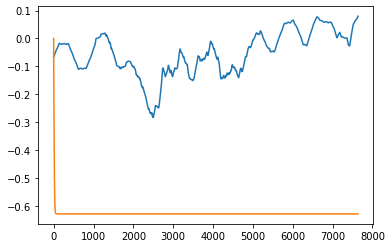

In [12]:
plt.plot(data[input_length:day]), plt.plot(output[input_length:day])

In [13]:
df = pd.read_csv('../datasets/processed/windowed_250.csv')
data_2 = df['usage'][25000:25000+day].copy()
del df
gc.collect()
data_2 = np.array(data_2)
data_2.shape

(8640,)

In [8]:
esn.reservoir = [0.0 for i in range(esn.reservoir_size)]
output = [0] * (len(data_2)+1)
for i in range (len(data_2)):
    if i < input_length:
        esn.give_signal(data_2[i])
    else:
        output[i+1] = esn.get_output(0)

([<matplotlib.lines.Line2D at 0x1faa7da4eb0>],
 [<matplotlib.lines.Line2D at 0x1faa9fddf70>])

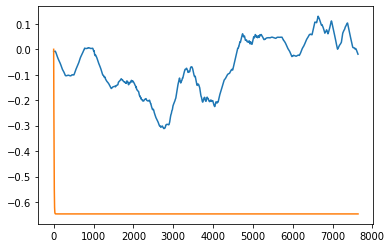

In [9]:
plt.plot(data_2[input_length:]), plt.plot(output[input_length:])